## zadanie 1

In [2]:
# import requests
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, numpy as np
from scipy.optimize import curve_fit

In [22]:
df = np.loadtxt(r"C:\Users\Maria Nowacka\Desktop\maria\5 semestr\kaszcz\zad1_lista1.txt")
X = df[:, 0]
Y = df[:, 1]

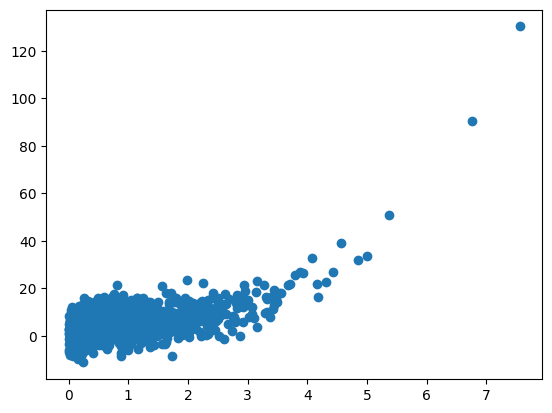

In [24]:
plt.scatter(X, Y)

In [25]:
def model(x, a, b):
    return a*np.exp(b*x)

In [26]:
popt, pcov = curve_fit(model, X, Y)
a, b = popt
print(f'Y = {a:.3f} * exp({b:.3f} * X)')

Y = 2.990 * exp(0.500 * X)


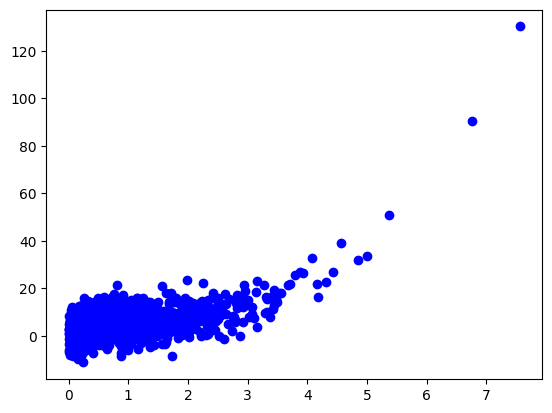

In [27]:
# Rysowanie wykresu rozproszenia
plt.scatter(X, Y, label='Dane', color='blue')

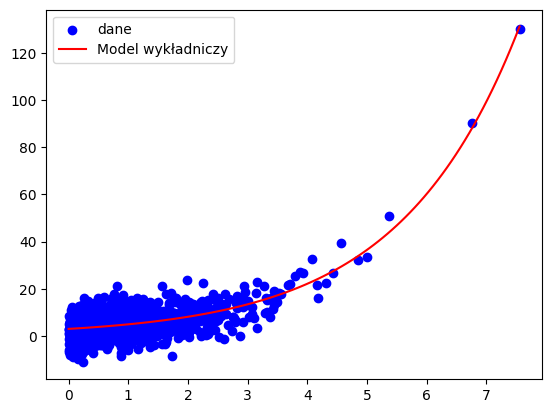

In [28]:
# Rysowanie dopasowanej funkcji wykładniczej
X_fit = np.linspace(min(X), max(X), 100)
Y_fit = model(X_fit, *popt)
plt.scatter(X, Y, label = 'dane', color='blue')
plt.plot(X_fit, Y_fit, label='Model wykładniczy', color='red')
plt.legend()

In [ ]:
x_linspace = np.linspace(min(X), max(X), 500)
degree = 3
# Dopasowanie wielomianu o zadanym stopniu
wspolczynniki = np.polyfit(X, Y, degree)

# Utworzenie funkcji wielomianowej
poly_func = np.poly1d(wspolczynniki)

# Wygenerowanie wartości Y na podstawie modelu (dla ciągłej linii)
Y_fit = poly_func(x_linspace)

# Obliczenie przewidywanych wartości Y dla danych X
Y_pred = poly_func(X)

# Generowanie wzoru wielomianu w formacie LaTeX
wzor_wielomianu = " + ".join([f"{coef:.2f}x$^{i}$" if i > 0 else f"{coef:.2f}" 
                              for i, coef in enumerate(reversed(poly_func.coefficients))])
# Rysowanie dopasowania
plt.plot(x_linspace, Y_fit, label=f'{wzor_wielomianu}')
plt.scatter(X, Y)

# Dodatkowe elementy wykresu
plt.xlabel('Zmienna objaśniająca')
plt.ylabel('Zmienna objaśniana')
plt.title('Porównanie regresji wielomianowej od stopnia 1 do 5')
plt.legend()
plt.show()


## zadanie 2

In [32]:
# df2 = np.loadtxt(r"C:\Users\Maria Nowacka\Desktop\maria\5 semestr\metody_num\zad2_lista1.txt")
df2 = pd.read_csv(r"C:\Users\Maria Nowacka\Desktop\maria\5 semestr\metody_num\zad2_lista1.txt", delim_whitespace=True, header=None, names=['values'])

# Kolumna z danymi
values = df2['values']
print(df2['values'])

0       1.838676
1       1.855805
2       0.697521
3       1.296238
4       0.755621
          ...   
9995   -0.264952
9996    1.841796
9997   -0.019291
9998    0.016198
9999    2.329453
Name: values, Length: 10000, dtype: float64


In [21]:
def simple_moving_average(data, window_size):
    return data.rolling(window=window_size, center=True).mean()

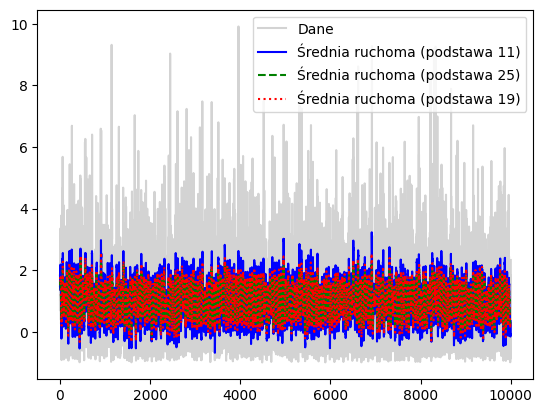

In [33]:
# Średnie ruchome o podstawie 11, 25 oraz 2p+1
window_11 = simple_moving_average(df2, 11)
window_25 = simple_moving_average(df2, 25)
p = 9
window_2p1 = simple_moving_average(df2, 2 * p + 1)
# Wykresy średnich ruchomych
plt.plot(values, label = 'Dane', color = 'lightgrey')
plt.plot(window_11, label='Średnia ruchoma (podstawa 11)', color='blue')
plt.plot(window_25, label='Średnia ruchoma (podstawa 25)', color='green', linestyle = '--')
plt.plot(window_2p1, label=f'Średnia ruchoma (podstawa {2*p+1})', color='red', linestyle = ':')
plt.legend()

In [23]:
def custom_moving_average(data, p):
    ma_values = []
    n = len(data)
    window_size = 2 * p + 1

    # Iterujemy przez dane, ale tylko od p do n - p
    for t in range(p, n - p):
        window_sum = 0

        # Sumujemy wartości od -p do p dla bieżącego punktu t
        for j in range(-p, p + 1):
            window_sum += data[t + j]

        # Obliczamy średnią dla tego punktu
        ma_value = window_sum / window_size
        ma_values.append(ma_value)

    # Uzupełniamy początkowe i końcowe wartości NaN
    ma_values = [None] * p + ma_values + [None] * p
    return pd.Series(ma_values)

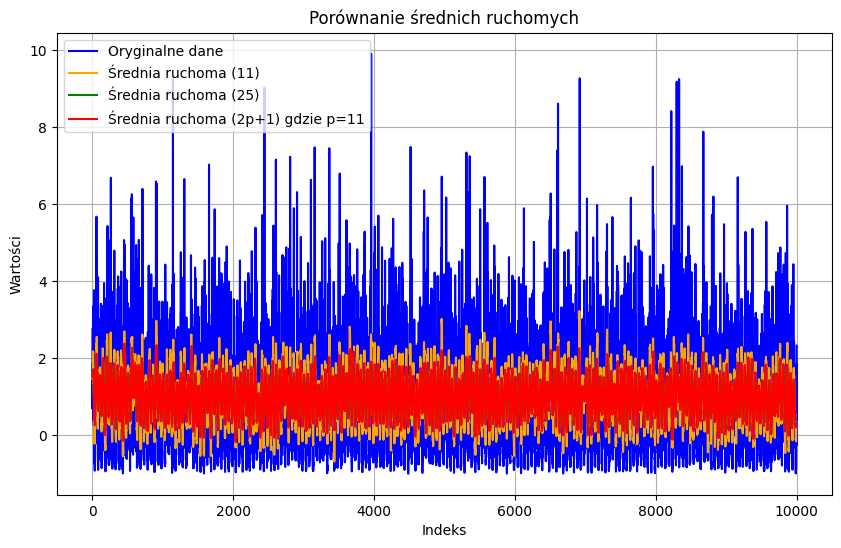

In [34]:
# Obliczanie średnich ruchomych dla różnych okien
p_11 = 5  # Średnia ruchoma 11 to p=5
ma_11 = custom_moving_average(values, p_11)

p_25 = 12  # Średnia ruchoma 25 to p=12
ma_25 = custom_moving_average(values, p_25)

# Podstawa 2p + 1, gdzie p jest dowolną liczbą wybraną przez użytkownika
p = 11
ma_2p1 = custom_moving_average(values, p)

# Wykres danych
plt.figure(figsize=(10, 6))
plt.plot(values, label='Oryginalne dane', color='blue')
plt.plot(ma_11, label='Średnia ruchoma (11)', color='orange')
plt.plot(ma_25, label='Średnia ruchoma (25)', color='green')
plt.plot(ma_2p1, label=f'Średnia ruchoma (2p+1) gdzie p={p}', color='red')
plt.legend()
plt.title('Porównanie średnich ruchomych')
plt.xlabel('Indeks')
plt.ylabel('Wartości')
plt.grid(True)
plt.show()

## zadanie 3

In [ ]:
X = np.loadtxt(r'C:\Users\Maria Nowacka\Desktop\maria\5 semestr\kaszcz\zad2_lista1.txt')
Y = np.loadtxt(r'C:\Users\Maria Nowacka\Desktop\maria\5 semestr\kaszcz\zad3_lista1.txt')

In [27]:
# from scipy.stats import linregress
# Funkcja do obliczenia współczynnika nachylenia (b1) i wyrazu wolnego (b0)
def oblicz_regresje(x, y):
    # Obliczenie współczynnika b1
    b1 = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x))**2)

    # Obliczenie współczynnika b0
    b0 = np.mean(y) - b1 * np.mean(x)

    return b0, b1


Współczynnik b0: 5.226906171237193
Współczynnik b1: 19.966464658199964


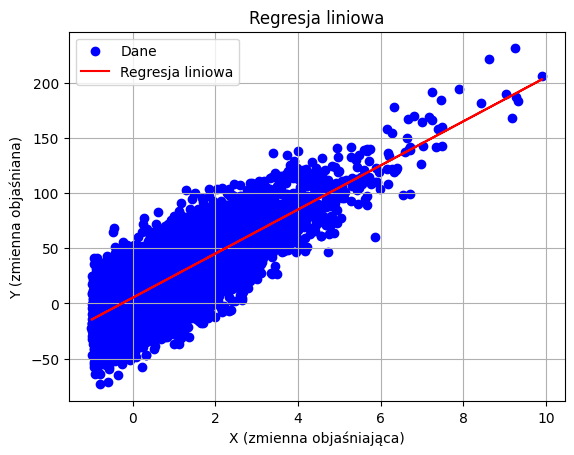

In [35]:
b0, b1 = oblicz_regresje(X, Y)

# Wyświetlenie wyników
print(f"Współczynnik b0: {b0}")
print(f"Współczynnik b1: {b1}")

# Rysowanie wykresu
plt.scatter(X, Y, label='Dane', color='blue')
plt.plot(X, b0 + b1 * X, label='Regresja liniowa', color='red')
plt.legend()
plt.title(f'Regresja liniowa')
plt.xlabel('X (zmienna objaśniająca)')
plt.ylabel('Y (zmienna objaśniana)')
plt.grid(True)
plt.show()

5.364406126766681 19.82621096175383


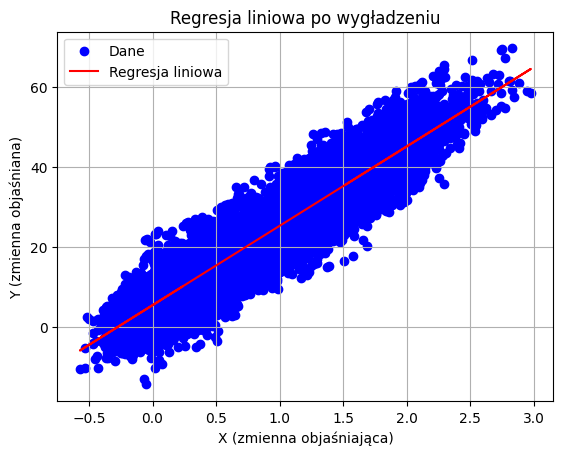

In [36]:
x_smooth = custom_moving_average(X, 6)
y_smooth = custom_moving_average(Y, 6)
b00, b11 = oblicz_regresje(x_smooth, y_smooth)
print(b00, b11)
# Rysowanie wykresu
plt.scatter(x_smooth, y_smooth, label='Dane', color='blue')
plt.plot(x_smooth, b00 + b11 * x_smooth, label='Regresja liniowa', color='red')
plt.legend()
plt.title(f'Regresja liniowa po wygładzeniu')
plt.xlabel('X (zmienna objaśniająca)')
plt.ylabel('Y (zmienna objaśniana)')
plt.grid(True)
#plt.show()

## zadanie 4

In [4]:
from scipy import stats

In [5]:
x4 = np.loadtxt(r"C:\Users\Maria Nowacka\Desktop\maria\5 semestr\kaszcz\zad4_lista1.txt")

In [6]:
X = x4[:, 0]
Y = x4[:, 1]

In [7]:
b0, b1 = oblicz_regresje(X, Y)
b0, b1

(5.2851738537543556, 20.578831014287932)

In [9]:
# Konwersja do tablic numpy
X = np.array(X)
Y = np.array(Y)
X, Y

(array([ 1.9432217e+00,  4.8030465e+00, -4.4844960e+00,  2.9322817e+00,
        -6.4188656e-01, -1.8829811e+00,  2.2265751e+00, -1.3789310e+00,
        -1.3103529e+00,  4.1123798e+00, -1.2280536e+00,  1.2472077e+00,
        -1.6650910e+00, -6.8293451e-01, -1.7869851e+00,  6.3067657e-01,
        -1.8732313e+00,  6.1509989e-01, -1.0252211e+01,  4.3278159e-01,
        -1.0447133e+00,  3.9249198e-01, -1.9198788e+00,  6.3450388e-01,
         6.3259499e-02,  2.2510997e+00, -7.8272689e-01,  1.5561598e-01,
        -2.5457962e+00, -2.7406803e-01,  3.9031400e-01, -5.8005951e-01,
        -5.0553671e-01, -4.5676385e-01,  1.3600943e+00, -1.0574703e+00,
         1.5477030e+00,  3.5224300e-01, -6.4564331e-02, -2.9582654e+00,
        -2.8502203e-01, -4.6182278e-02, -2.1413867e+00,  1.7732381e-01,
         3.8412987e+00,  2.6215242e-02, -1.9678426e+00, -9.7249334e-01,
         7.6716514e-01,  1.3044158e+01, -2.2631213e+00,  1.9666918e+00,
        -1.6197398e-02,  4.7345243e-01, -1.8994969e+00, -1.18472

In [10]:
Y_pred = b0 + b1 * X
residuals = Y - Y_pred

In [11]:
std_residuals = np.std(residuals)
outliers = np.abs(residuals) > 2 * std_residuals  # Obserwacje odstające
np.sum(outliers)

42

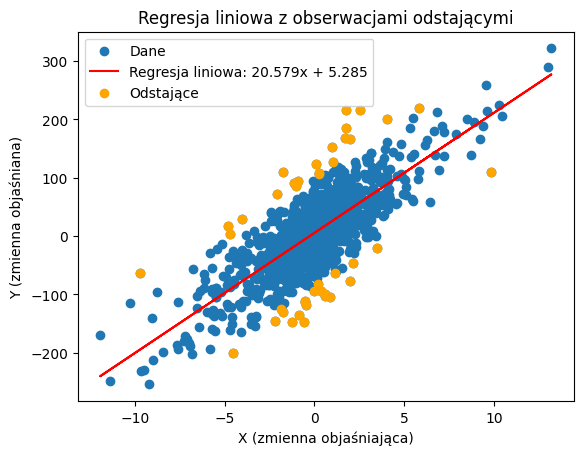

In [13]:
plt.scatter(X, Y, label='Dane')
plt.plot(X, Y_pred, color='red', label=f'Regresja liniowa: {b1:.3f}x + {b0:.3f}')
plt.scatter(X[outliers], Y[outliers], color='orange', label='Odstające', zorder=5)
plt.legend()
plt.title('Regresja liniowa z obserwacjami odstającymi')
plt.xlabel('X (zmienna objaśniająca)')
plt.ylabel('Y (zmienna objaśniana)')
plt.show()

In [14]:
X_clean = X[~outliers]
Y_clean = Y[~outliers]
b0_new, b1_new = oblicz_regresje(X_clean, Y_clean)

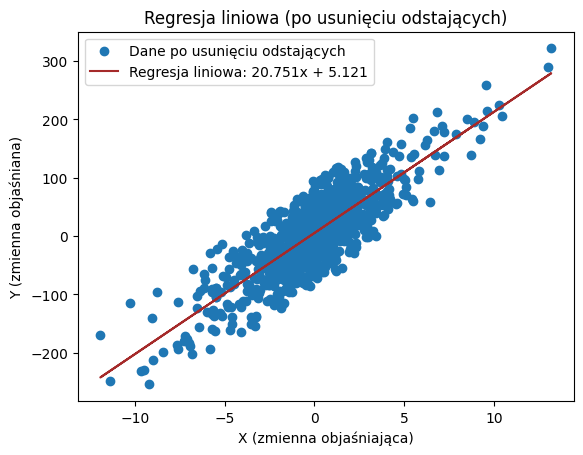

In [16]:
Y_pred_clean = b0_new + b1_new * X_clean
plt.scatter(X_clean, Y_clean, label='Dane po usunięciu odstających')
plt.plot(X_clean, Y_pred_clean, color='brown', label=f'Regresja liniowa: {b1_new:.3f}x + {b0_new:.3f}')
plt.legend()
plt.title(f'Regresja liniowa (po usunięciu odstających)')
plt.xlabel('X (zmienna objaśniająca)')
plt.ylabel('Y (zmienna objaśniana)')
plt.show()

## zadanie 5

In [17]:
from scipy.optimize import curve_fit

In [11]:
b00, b11 = oblicz_regresje(X[0:990], Y[0:990])
b00, b11

(5.228135761231345, 20.570106217187895)

In [12]:
Y_pred = b00 + b11 * X[991:]
errors = np.abs(Y[991:] - Y_pred)

(991.0, 1000.0)

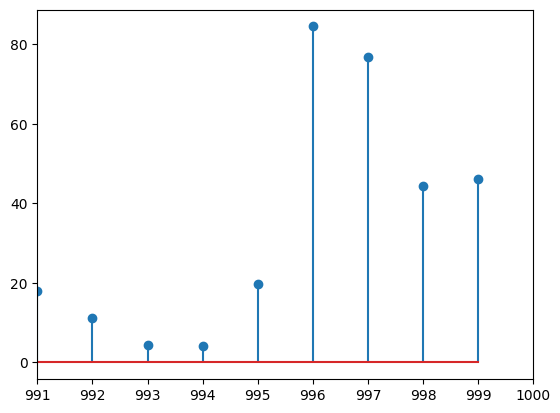

In [15]:
plt.stem(range(991, 991 + len(errors)), errors, label = 'błędy predykcji')
plt.xlim(991, 1000)

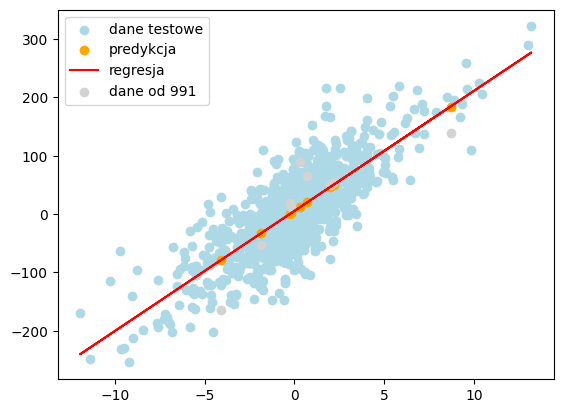

In [99]:
plt.scatter(X[0:990], Y[0:990], color = 'lightblue', label = "dane testowe")
plt.scatter(X[991:], Y_pred, color = 'orange', label = "predykcja")
plt.plot(X, b11*X + b0, color ='red', label = "regresja")
plt.scatter(X[991:], Y[991:], label = "dane od 991", color = 'lightgrey')
plt.legend()

## zadanie 6

In [18]:
x6 = np.loadtxt(r"C:\Users\Maria Nowacka\Desktop\maria\5 semestr\kaszcz\zad6_lista1.txt")
X = x6[:, 0]
Y = x6[:, 1]

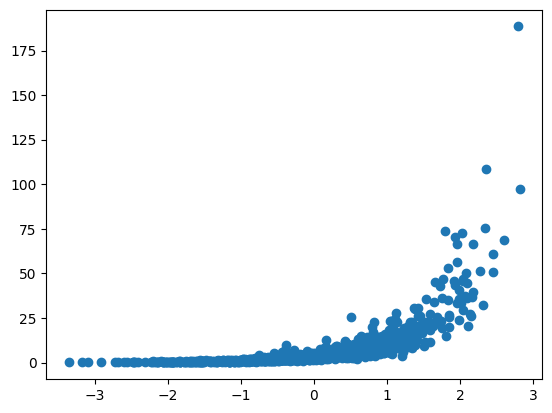

In [19]:
plt.scatter(X, Y)

In [20]:
def model(x, a, b):
    return a * np.exp(b * x)

Y = 3.070 * exp(1.304 * X)


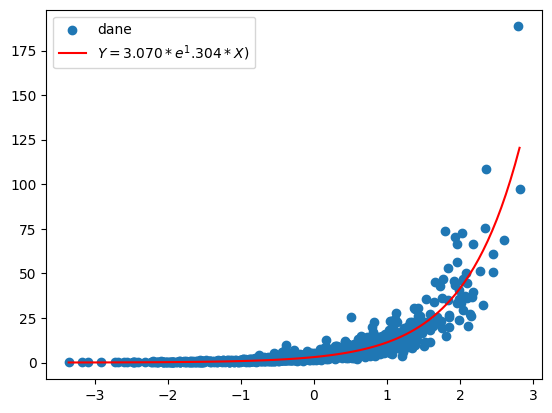

In [24]:
popt, pcov = curve_fit(model, X, Y)
a, b = popt
print(f'Y = {a:.3f} * exp({b:.3f} * X)')
# Rysowanie dopasowanej funkcji wykładniczej
X_fit = np.linspace(min(X), max(X), 100)
Y_fit = model(X_fit, *popt)
plt.scatter(X, Y, label = 'dane')
plt.plot(X_fit, Y_fit, label=f'$Y = {a:.3f} * e^{b:.3f} * X)$', color='red')
plt.legend()

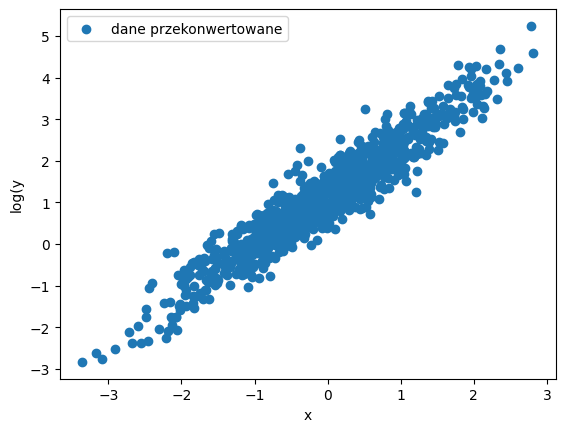

In [26]:
log_y = np.log(Y)
plt.scatter(X, np.log(Y), label = 'dane przekonwertowane')
plt.xlabel('x')
plt.ylabel('log(y')
plt.legend()

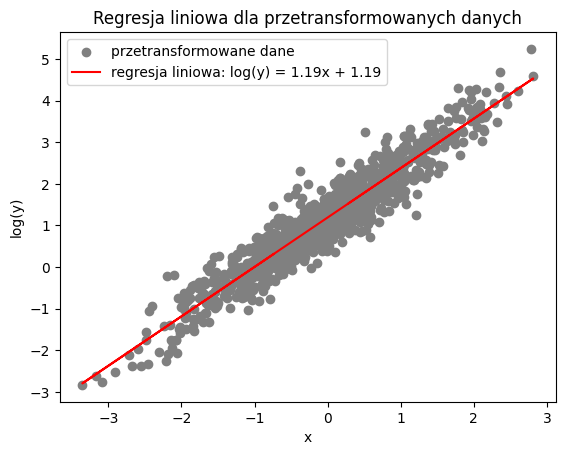

In [33]:
# Fit the linear regression model
B0, B1 = oblicz_regresje(X, log_y)

# Step 5: Plot the regression line with the transformed data
plt.scatter(X, log_y, color='grey', label='przetransformowane dane')
plt.plot(X, B0 + B1*X, color='red', label=f'regresja liniowa: log(y) = {B1:.2f}x + {B0:.2f}')
plt.title('Regresja liniowa dla przetransformowanych danych')
plt.xlabel('x')
plt.ylabel('log(y)')
plt.legend()
plt.show()

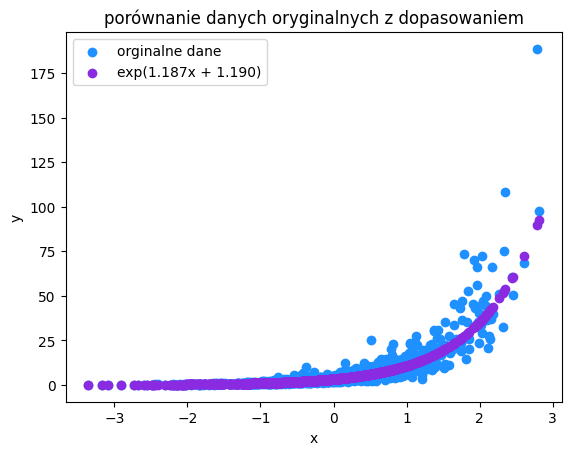

(1.1904809318009153, 1.1869261103422122)

In [47]:
plt.scatter(X, Y, color='dodgerblue', label='orginalne dane')
plt.scatter(X, np.exp(B0 + B1*X), color='blueviolet', label=f'exp({B1:.3f}x + {B0:.3f})')
plt.title('porównanie danych oryginalnych z dopasowaniem')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
B0, B1